## Chi square test to show goodness of fit
Did the data come from an **expected multi-category distribution**?

For example, can we determine if a 6-sided die is fair or not?

This notebook is also demonstrating some useful Python along the way:
* Numpy np.random.choice sampling with unequal probabilities
* A plot with several subplots with a minimum of code  
* The usefulness of Counters
* SciPy stats chisquare test
* f-string formatting

Reference: [Yale Chi-square goodness of fit](http://www.stat.yale.edu/Courses/1997-98/101/chigf.htm)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
from collections import Counter

In [2]:
plt.rcParams.update({'font.size': 14})  # bigger font than default

In [3]:
# number of rolls of the dice
nrolls = 120

In [4]:
# set a random seed so that we all get the same thing
np.random.seed(114)

In [5]:
# fair dice distribution
fair_rolls = np.random.randint(1, 7, size = (nrolls, ))
fair_rolls

array([3, 4, 3, 4, 5, 3, 1, 2, 4, 6, 1, 5, 4, 5, 1, 5, 4, 6, 1, 6, 6, 5,
       6, 6, 4, 2, 5, 5, 1, 5, 5, 2, 3, 5, 3, 2, 6, 5, 2, 4, 2, 3, 5, 4,
       1, 2, 6, 4, 5, 4, 4, 1, 3, 4, 5, 4, 3, 2, 4, 6, 4, 3, 6, 3, 3, 2,
       4, 2, 6, 4, 4, 5, 1, 6, 4, 6, 5, 6, 5, 4, 2, 5, 3, 3, 6, 6, 4, 3,
       4, 6, 3, 6, 3, 5, 2, 4, 6, 6, 2, 5, 4, 3, 5, 3, 6, 5, 5, 3, 5, 6,
       1, 3, 1, 6, 4, 4, 1, 5, 2, 6])

In [6]:
# weighted (unfair) rolls
# Note how we can set the probability of each choice.  Default is equal.
unfair_rolls = np.random.choice(np.arange(1, 7), 
                                p = [0.1, 0.05, 0.3, 0.4, 0.05, 0.1], 
                                size = (nrolls,))
unfair_rolls

array([4, 3, 4, 2, 3, 4, 3, 4, 4, 3, 3, 3, 3, 1, 1, 5, 4, 4, 4, 4, 3, 3,
       4, 5, 4, 4, 4, 4, 6, 3, 3, 3, 5, 4, 5, 3, 4, 1, 3, 5, 6, 2, 4, 4,
       4, 1, 3, 4, 4, 3, 1, 3, 1, 4, 6, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 1,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 5, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4,
       4, 3, 6, 3, 3, 4, 4, 4, 6, 4, 4, 4, 6, 5, 3, 5, 1, 1, 3, 4, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3])

In [7]:
# expected frequencies if perfectly fair
# note that of course they would be shuffled, but here shown in sequence
expected_rolls = np.array([num for _ in range(int(nrolls/6)) 
                           for num in range(1,7)])
expected_rolls

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6])

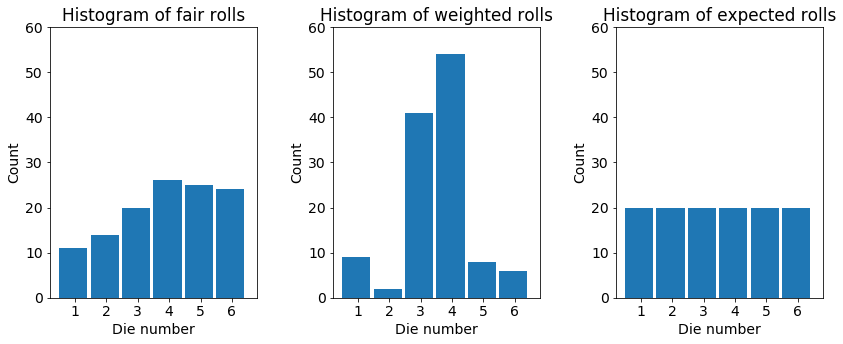

In [8]:
def plot_rolls(rolls, titles):
    '''Plot roll frequency for 6 sided die'''
    ndists = len(rolls)
    fig, axs = plt.subplots(nrows=1, ncols=ndists, figsize=(12, 5))
    for i in range(ndists):
        axs[i].hist(rolls[i], bins=6, range=(0.5, 6.5), width=0.9)
        axs[i].set_ylim(0, 60)
        axs[i].set_xticks(np.arange(1,7))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel("Die number")
        axs[i].set_ylabel("Count")
    plt.tight_layout() # show with and without this line

rolls = [fair_rolls, unfair_rolls, expected_rolls]
titles = ['Histogram of fair rolls', 
          'Histogram of weighted rolls',
          'Histogram of expected rolls']

plot_rolls(rolls, titles)

In [9]:
# get frequencies for fair counts
fair_counts = Counter(fair_rolls)
print("Fair die counts:")
for die_num, count in sorted(fair_counts.items()):
    print("Die number: {0}, count: {1}".format(die_num, count))
fair_freqs = [fair_counts[i] for i in range(1, 7)]
print(f'\nFair frequency counts: {fair_freqs}.')

Fair die counts:
Die number: 1, count: 11
Die number: 2, count: 14
Die number: 3, count: 20
Die number: 4, count: 26
Die number: 5, count: 25
Die number: 6, count: 24

Fair frequency counts: [11, 14, 20, 26, 25, 24].


In [10]:
# frequencies for unfair counts
unfair_counts = Counter(unfair_rolls)
print("Unfair die counts:")
for die_num, count in sorted(unfair_counts.items()):
    print("Die number: {0}, count: {1}".format(die_num, count))
unfair_freqs = [unfair_counts[i] for i in range(1, 7)]
print(f'\nUnfair frequency counts: {unfair_freqs}.')

Unfair die counts:
Die number: 1, count: 9
Die number: 2, count: 2
Die number: 3, count: 41
Die number: 4, count: 54
Die number: 5, count: 8
Die number: 6, count: 6

Unfair frequency counts: [9, 2, 41, 54, 8, 6].


In [11]:
# frequencies for expected counts (if fair)
expected_counts = Counter(expected_rolls)
print("Expected die counts:")
for die_num, count in sorted(expected_counts.items()):
    print("Die number: {0}, count: {1}".format(die_num, count))
expected_freqs = [expected_counts[i] for i in range(1, 7)]
print(f'\nExpected frequency counts: {expected_freqs}.')

Expected die counts:
Die number: 1, count: 20
Die number: 2, count: 20
Die number: 3, count: 20
Die number: 4, count: 20
Die number: 5, count: 20
Die number: 6, count: 20

Expected frequency counts: [20, 20, 20, 20, 20, 20].


## Perform Chi-squared test

In [12]:
ans_fair = stats.chisquare(fair_freqs, expected_freqs, axis=0)
ans_fair

Power_divergenceResult(statistic=9.7, pvalue=0.08419581913411846)

In scipy stats, the chisquare Null Hypothesis assumption is that the data came from the same distribution.  A high p-value here indicates that the fair_freqs data was very likely to have come from the same distribution that made the expected_freqs.

In [13]:
ans_unfair = stats.chisquare(unfair_freqs, expected_freqs, axis=0)
ans_unfair

Power_divergenceResult(statistic=119.1, pvalue=4.867912965735093e-24)

A large test statistic and low p-value, we can reject the null (came from the same distribution) and accept the alternative (they didn't).